
## DBSCAN

Presented by: CORPUZ, Francis James

----


**Density-based Methods of Clustering**

Partitioning and hierarchical methods are designed to find spherical-shaped clusters.
They have difficulty finding clusters of arbitrary shape such as the “S” shape and oval
clusters. Given such data, they would likely inaccurately identify convex
regions, where noise or outliers are included in the clusters.
To find clusters of arbitrary shape, alternatively, we can model clusters as dense
regions in the data space, separated by sparse regions. This is the main strategy behind
density-based clustering methods, which can discover clusters of nonspherical shape.

<div>
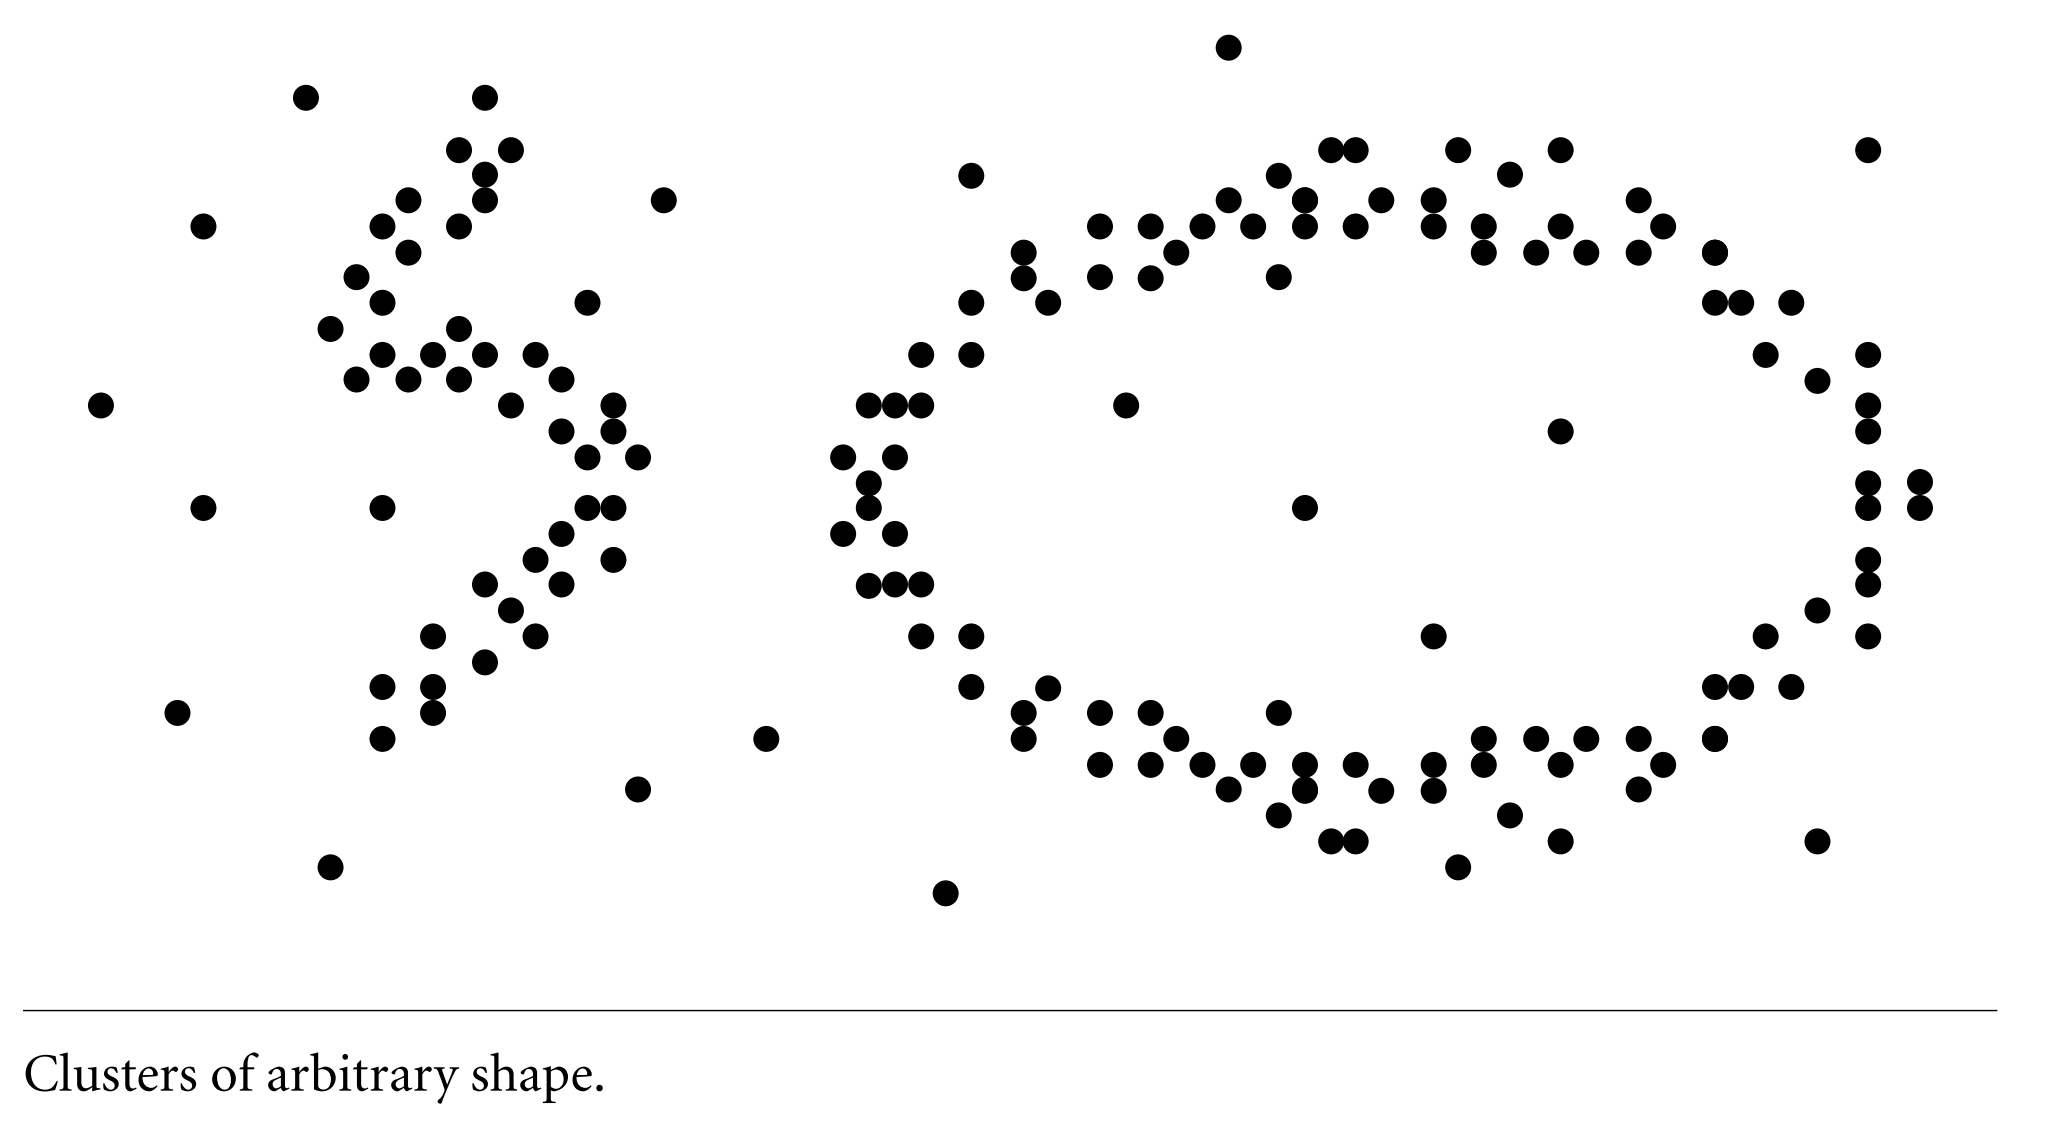
</div>





The general idea is to continue growing a given cluster as long as the density (number of objects or
data points) in the “neighborhood” exceeds some threshold. For example, for each
data point within a given cluster, the neighborhood of a given radius has to contain
at least a minimum number of points. Such a method can be used to filter out noise
or outliers and discover clusters of arbitrary shape. <br><br>
Density-based methods can divide a set of objects into multiple exclusive clusters, or a hierarchy of clusters. Typically, density-based methods consider exclusive
clusters only, and do not consider fuzzy clusters. Moreover, density-based methods
can be extended from full space to subspace clustering.


<div>
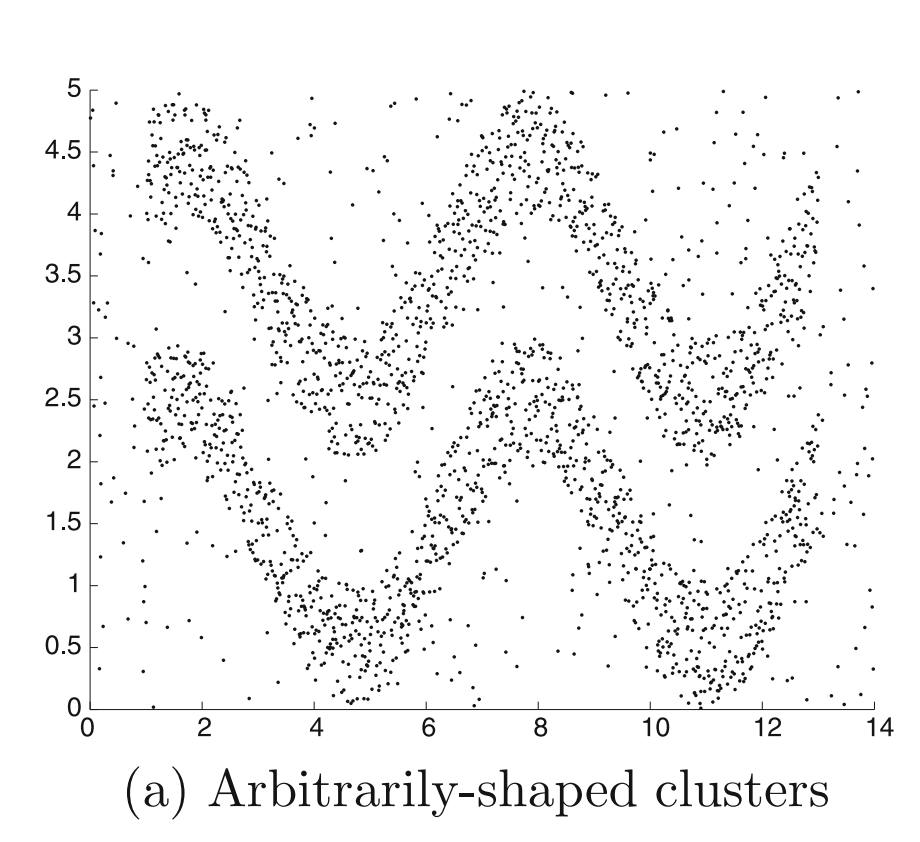
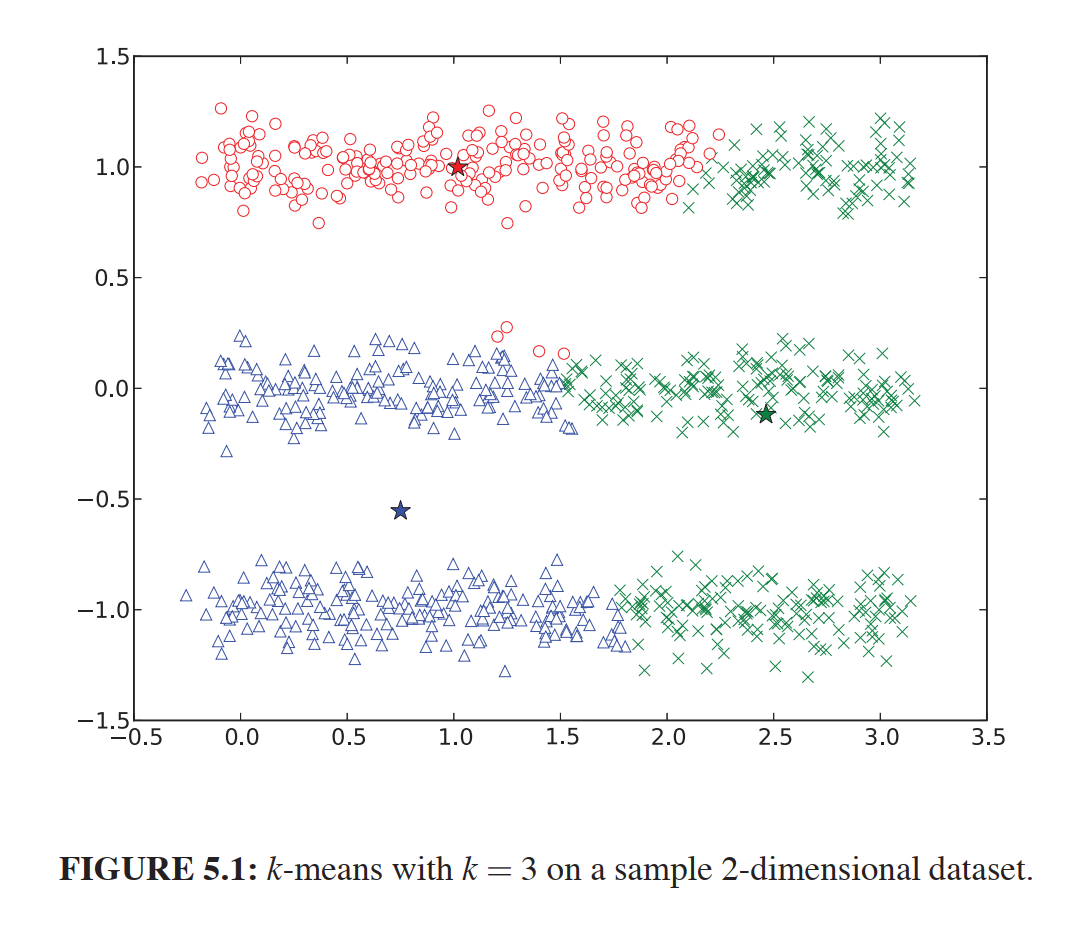
</div>




General Idea: <br>
**First**, nondense points, that have fewer than k neighbors within a distance of
r, are removed. <br>
**Second**, single-link is employed to cluster the remaining points. <br>
**Finally**, nondense
points may be allocated to one of the clusters according to some criterion.



## DBSCAN
### Density-based Clustering of Applications with Noise

The DBSCAN approach works on a very similar principle as grid-based methods. However,
unlike grid-based methods, the density characteristics of data points are used to merge them
into clusters. Therefore, the individual data points in dense regions are used as building
blocks after classifying them on the basis of their density.
The density of a data point is defined by the number of points that lie within a radius
Epsilon $\epsilon$ of that point (including the point itself). The densities of these spherical regions are
used to classify the data points into **core, border, or noise points.** <br>

Definitions:<br>
**Core point:** A data point is defined as a core point, if it contains at least Tau τ or $MinPts$ data
points. <br>
**Border point:** A data point is defined as a border point, if it contains less than Tau τ or $MinPts$ points, but it also contains at least one core point within a radius $\epsilon$ <br>
**Noise point**: A data point that is neither a core point nor a border point is defined as a noise point.

DBSCAN finds core objects and their neighborhoods to form dense regions or clusters. The parameter Epsilon $\epsilon$ is used to define the radius of a neighborhood we consider for every object. The $\epsilon$-neighborhood of an object $o$ is the space between a radius of Epsilon $\epsilon$ centered at object $o$

Given a set D of objects, we can identify and label all core points in the data set, given the parameters Epsilon $\epsilon$ and $\tau $ or $MinPts$. The clustering tasks is therein reduced to using core points and their respective neighborhoods to form dense regions, where the dense regions are clusters.

**For $\tau$ = 10**
<div>
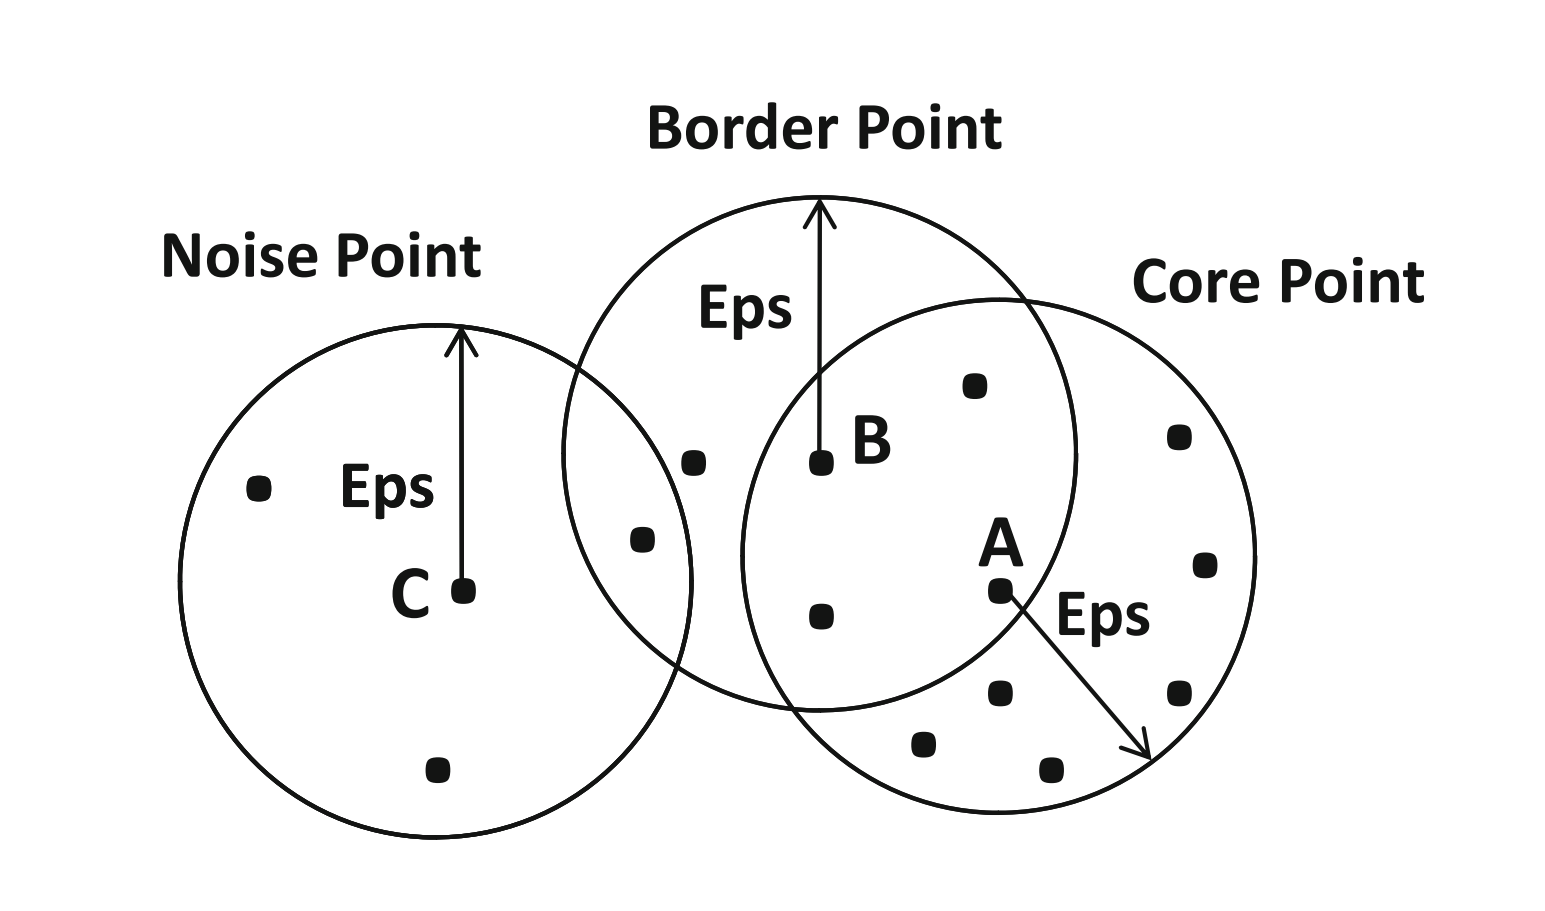
</div>


The data point A is a core point because it contains 10 data points within the
illustrated radius Epsilon $\epsilon$. On the other hand, data point B contains only 6 points within a
radius of Epsilon $\epsilon$, but it contains the core point A. Therefore, it is a border point. The data
point C is a noise point because it contains only 4 points within a radius of Epsilon $\epsilon$, and it
does not contain any core point



**Algorithm**: *DBSCAN*: a density-based clustering algorithm <br>
**Input**:
- $D$: a dataset containing $n$ objects
- $\epsilon$ : the radius parameter
- $\tau$: the neighborhood density threshold
**Output**: A setof density-based clusters  <br>
**Method**: <br>
$\quad$ **begin** <br>
$\quad$$\quad$ Determine core, border, and noise points given parameters $/epsilon$ and $/tau$ <br>
$\quad$$\quad$ Create graph in which the core points are connected given parameter $/epsilon$ <br>
$\quad$$\quad$ Determine connected components (clusters) in graph <br>
$\quad$$\quad$ Assign border point to connected component with which it is best connected <br>
$\quad$**return** points in each connected component as a cluster  <br>
**end**

**Practical Issues**
* is very similar to grid-based methods, except that it uses circular
regions as building blocks (circular regions generally provides a smoother contour)
* strengths and weaknesses are similar to grid-based clustering (advantage: no need to define number of clusters; disadvantage: susceptible to variations in local density)
* If spatial index is used, the computational complexity of DBSCAN is **$O(nlogn)$**, where $n$ is the number of database objects. Otherwise, the complexity is **$O(n^2)$**
* Given a value for $MinPts$ or $\tau$, the cut-off value for Epsilon $\epsilon$ can be computed in a data-driven way (calculate distance where the $\tau$-nearest neighbors start to increase significantly (using Z-value tests, etc)


<div>
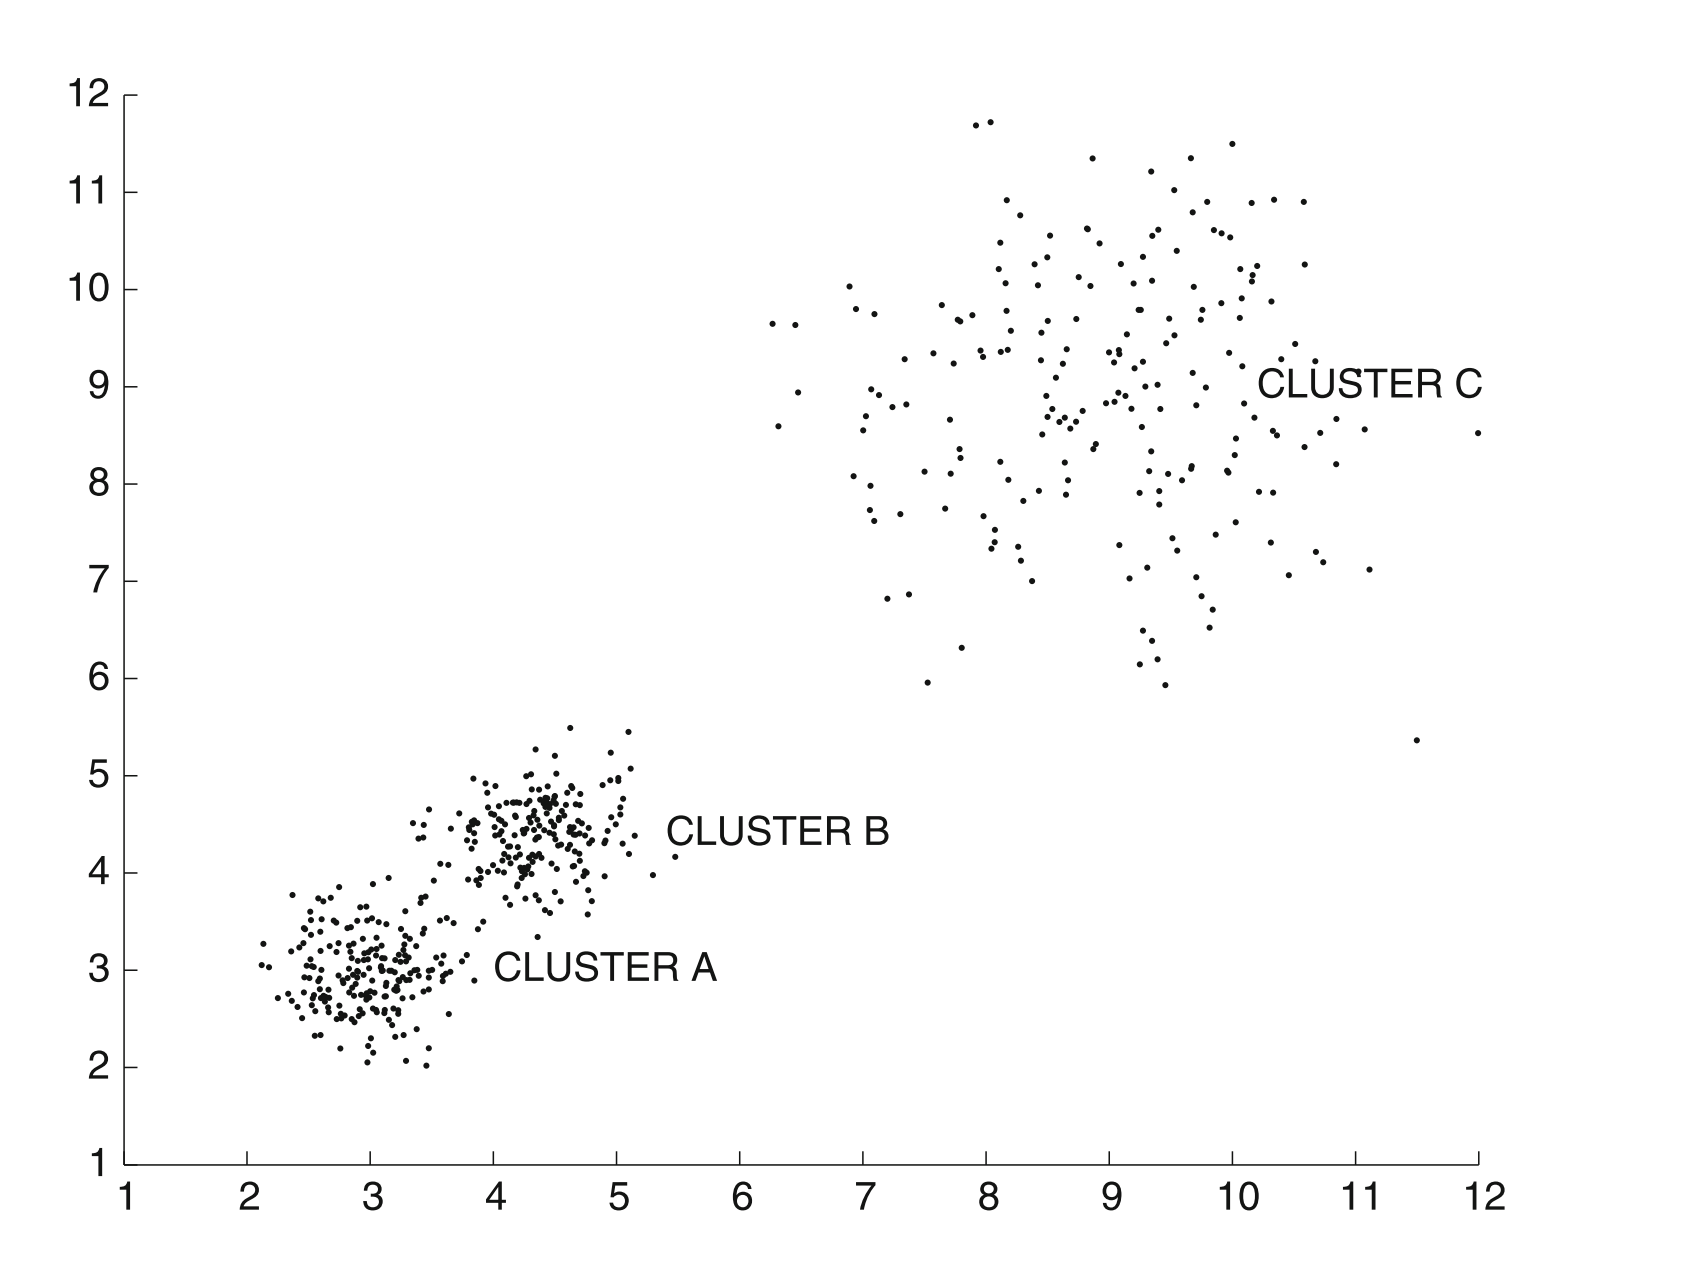
</div>



In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler






In [2]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [3]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)




Estimated number of clusters: 3
Estimated number of noise points: 18


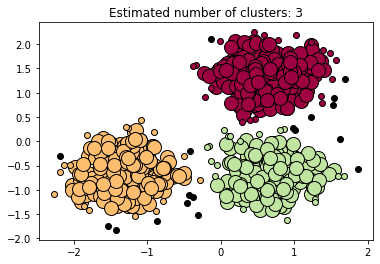

In [4]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [7]:
# #############################################################################
# Generate sample data
X, labels_true = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.4)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 0


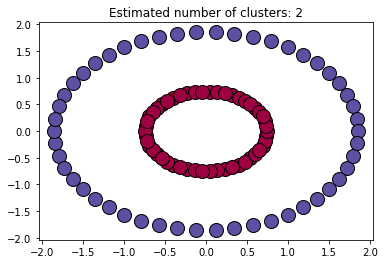

In [8]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [22]:
# #############################################################################
# Generate sample data
X, labels_true = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


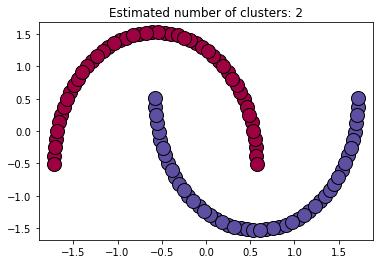

In [23]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()